<a href="https://colab.research.google.com/github/SangBeom-Hahn/BOAZ/blob/main/5%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# estimators 사용 예제

-> 하던 도중에 나온 tensorflow gpu 사용법

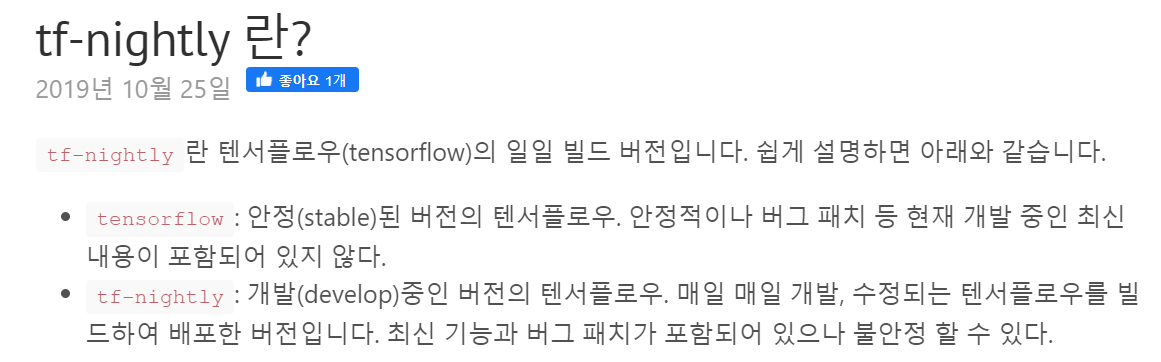

In [ ]:
pip install tf-nightly-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.4 MB 7.0 kB/s 
     |████████████████████████████████| 439 kB 57.8 MB/s 
     |████████████████████████████████| 1.7 MB 53.6 MB/s 
     |████████████████████████████████| 6.0 MB 34.4 MB/s 
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 22.9.24 which is incompatible.


In [ ]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 15 kB/s 
     |████████████████████████████████| 5.9 MB 39.9 MB/s 
     |████████████████████████████████| 438 kB 67.6 MB/s 
     |████████████████████████████████| 1.7 MB 70.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

# tf hub

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image


classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

IMAGE_SHAPE = (224, 224)


input_shape=IMAGE_SHAPE+(3,)

In [ ]:
input_shape

(224, 224, 3)

In [ ]:
# tf.keras와 작업하고자 HUB와 래핑
classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper = np.array(grace_hopper)/255.0

61306/61306 [==============================] - 0s 0us/step


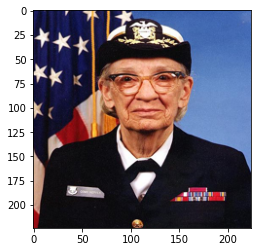

In [ ]:
import cv2
import matplotlib.pyplot as plt

plt.imshow(grace_hopper)

In [ ]:
grace_hopper.shape # 입력 사이즈 모바일 넷에 맞춤

(224, 224, 3)

In [ ]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)
print (predicted_class)

1/1 [==============================] - 1s 752ms/step
653


# VQA

컴터에게 사진을 주면서 사진에 관한 질문을 한다 = 묻는 말이 이 영상에서 뭘 묻는 건지 영상과 자연어를 잇는 문제이다, 
>
대답은 또 자연어로 답한다. = 자연어를 이해해서 영상에서 답을 찾아서 자연어로 답한다.


- 데이터 셋 VQA
- 아이디어 : 여러 매체 유형을 통합해 통합된 해석을 제공 ex) 이미지 인식과 텍스트 자연어 처리를 결합 ★ 이러한 질문에 답변하려면 비전, 언어의 이해와 상식이 필요하다

-> vqa같은 것을 하려면 적절한 데이터 셋이 필요하다.

https://visualqa.org/



-> 결론 : 책에서는 쉽게 나오는데 이미지와 자연어를 둘 다쓰는 어려운 모델이다, 데이터도 없어서 학습하는데는 무리이다.

In [ ]:
# Import Keras 
import tensorflow as tf
from tensorflow.keras import layers, models

# IMAGE
#
# Define CNN for visual processing
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', 
		input_shape=(224, 224, 3)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.summary()

#define the visual_model with proper input
image_input = layers.Input(shape=(224, 224, 3))
visual_model = cnn_model(image_input)
#




# TEXT
#
#define the RNN model for text processing
question_input = layers.Input(shape=(100,), dtype='int32')
emdedding = layers.Embedding(input_dim=10000, output_dim=256, 
	input_length=100)(question_input)
encoded_question = layers.LSTM(256)(emdedding)


# combine the encoded question and visual model
merged = layers.concatenate([encoded_question, visual_model])
#attach a dense network at the end
output = layers.Dense(1000, activation='softmax')(merged)

#get the combined model
vqa_model = models.Model(inputs=[image_input, question_input], outputs=output)
vqa_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                    

In [ ]:
# https://github.com/GT-Vision-Lab/VQA 깃허브 파헤쳐서 모델 훈련시켜보기 -> 오우 이런 쉬운 건 자신감이 붙었다!! > 역시 어려운 거를 봐로 봐버리니깐 이런 쉬운 거를 연습하기 좋다!!
!git clone https://github.com/VedantYadav/VQA.git

Cloning into 'VQA'...
remote: Enumerating objects: 192, done.
remote: Total 192 (delta 0), reused 0 (delta 0), pack-reused 192
Receiving objects: 100% (192/192), 8.33 MiB | 2.14 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [ ]:
cd /content/VQA

/content/VQA


In [ ]:
pwd

'/content/VQA'

In [ ]:
# requirement 맞추기 전
#!python train.py

Traceback (most recent call last):
  File "train.py", line 2, in <module>
    import prepare_data
  File "/content/VQA/prepare_data.py", line 9, in <module>
    from keras.preprocessing.sequence import pad_sequences
ImportError: cannot import name 'pad_sequences' from 'keras.preprocessing.sequence' (/usr/local/lib/python3.7/dist-packages/keras/preprocessing/sequence.py)


###  requirement 맞추기 시작

Python 2.7

Numpy

Scipy (for loading pre-computed MS COCO features)

NLTK (for tokenizer)

Keras

Theano

In [ ]:
cd /content

/content


In [ ]:
pwd

'/content'

In [ ]:
!python --version

Python 3.7.15


https://www.python.org/ftp/python 여기서 2.7버전 다운

In [ ]:
  !wget https://www.python.org/ftp/python/2.7/Python-2.7.tgz
  !tar xvfz Python-2.7.tgz
  !Python-2.7/configure
  !make
  !sudo make install

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
gcc -pthread -shared build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/bufferedio.o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/bytesio.o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/fileio.o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/iobase.o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/_iomodule.o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/stringio.o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_io/textio.o -L/usr/local/lib -o build/lib.linux-x86_64-2.7/_io.so
building '_functools' extension
gcc -pthread -fPIC -fno-strict-aliasing -g -O2 -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I. -IInclude -IPython-2.7/Include -I/usr/local/include -I/content/Python-2.7/Include -I/content -c /content/Python-2.7/Modules/_functoolsmodule.c -o build/temp.linux-x86_64-2.7/content/Python-2.7/Modules/_functoolsmodule.o
gcc -pthread -shared build/temp.linux-x86_64-2.7/c

In [ ]:
!python --version

Python 2.7


In [ ]:
!pip install numpy
!pip install scipy
!pip install nltk
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install theano
import theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 8.5 MB/s 
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=caeb3527d726d68489a116a115fb0284403489b912f6b1fd99d95d07d0120e86
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built theano


In [ ]:
cd /content/VQA

/content/VQA


In [ ]:
pwd

'/content/VQA'

In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.2.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8
bokeh

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python train.py -model=2 -batch_size=100 -num_epochs=10

Traceback (most recent call last):
  File "train.py", line 1, in <module>
    import prepare_data
  File "/content/VQA/prepare_data.py", line 1, in <module>
    import numpy as np
ImportError: No module named numpy


In [ ]:
import numpy as np
import embedding
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Reshape, Dropout, Convolution2D, MaxPooling2D, ZeroPadding2D, Flatten, Concatenate

def vis_lstm():
	embedding_matrix = embedding.load()
	embedding_model = Sequential()
	embedding_model.add(Embedding(
		embedding_matrix.shape[0],
		embedding_matrix.shape[1],
		weights = [embedding_matrix],
		trainable = False))
	
	image_model = Sequential()
	image_model.add(Dense(
		embedding_matrix.shape[1],
		input_dim=4096,
		activation='linear'))
	image_model.add(Reshape((1,embedding_matrix.shape[1])))
	
	main_model = Sequential()
	main_model.add(Concatenate(
		[image_model,embedding_model], axis = -1))
	main_model.add(LSTM(1001))
	main_model.add(Dropout(0.5))
	main_model.add(Dense(1001,activation='softmax'))
	
	return main_model

def vis_lstm_2():
	embedding_matrix = embedding.load()
	embedding_model = Sequential()
	embedding_model.add(Embedding(
		embedding_matrix.shape[0],
		embedding_matrix.shape[1],
		weights = [embedding_matrix],
		trainable = False))
	
	image_model_1 = Sequential()
	image_model_1.add(Dense(
		embedding_matrix.shape[1],
		input_dim=4096,
		activation='linear'))
	image_model_1.add(Reshape((1,embedding_matrix.shape[1])))
	
	image_model_2 = Sequential()
	image_model_2.add(Dense(
		embedding_matrix.shape[1],
		input_dim=4096,
		activation='linear'))
	image_model_2.add(Reshape((1,embedding_matrix.shape[1])))
	
	main_model = Sequential()
	main_model.add(Concatenate(
		[image_model_1,embedding_model,image_model_2], concat_axis = -1))
	main_model.add(LSTM(1001))
	main_model.add(Dropout(0.5))
	main_model.add(Dense(1001,activation='softmax'))
	
	return main_model

def VGG_16(weights_path=None):
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
	model.add(Convolution2D(64, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, 3, 3, activation='relu'))
	model.add(MaxPooling2D((2,2), strides =(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, 3, 3, activation='relu'))
	model.add(MaxPooling2D((2,2), strides =(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, 3, 3, activation='relu'))
	model.add(MaxPooling2D((2,2), strides =(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, 3, 3, activation='relu'))
	model.add(MaxPooling2D((2,2), strides =(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, 3, 3, activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, 3, 3, activation='relu'))
	model.add(MaxPooling2D((2,2), strides =(2,2)))

	model.add(Flatten())
	model.add(Dense(4096, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(4096, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(1000, activation='softmax'))

	if weights_path:
		model.load_weights(weights_path)
	
	return model

# 리눅스에서 해보자

-> 판다스까지 깔았다 내일 train.py로 시작해보라
-> VQA 성공하고 virtual 박스 스냅샷 virtualenv 깐 순간으로 다시 찍어야함

In [ ]:
https://inistory.tistory.com/180
https://inistory.tistory.com/181
https://jsp-dev.tistory.com/entry/Python-%EA%B0%80%EC%83%81%ED%99%98%EA%B2%BD-virtualenv-%EC%82%AC%EC%9A%A9%EB%B2%95-%EC%A0%95%EB%A6%AC

# cnn text

-> 텍스트로 행렬로 표기하면 이미지를 28*28의 행렬로 표기한 것과 다를바 없다.

+그렇다면 행렬로 표기를 어캐 할까? 기본 단위를 단어로 하여 유사한 단어를 모두 함께 모은 후 이를 대표하는 기호로 나타냄(임베딩)

+임베딩을 할 때 주의할 점 : 행렬화를 하면 이미지를 표기하는 것과 다를 바 없다고 했는데 1. 단어는 행렬보다는 벡터에 가깝고, 2. 이미지는 인접한 픽셀이 연관성이 컸는데 단어는 인접한 단어라고 해서 연관성이 크다고 볼 수 없다.

+cnn을 텍스트에 쓰면 어디에 쓰이니?

1.감정분석
2.텍스트가 유용한 정보인지 스팸인지 이해해야하는 스팸탐지
3.텍스트의 모든 것을 이해해야하는 주제 분류

-> cnn이 텍스트에 안 되는 것
1.논리적 역할(동사, 부사, 주어)을 이해하는 것이 목표인 품사태깅
2.개체추출

=텍스트의 논리를 따지면 cnn이 적합하지 않나봐

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
import tensorflow_datasets as tfds

max_len = 200
n_words = 10000
dim_embedding = 256
EPOCHS = 20
BATCH_SIZE =500

def load_data():
	#load data
	(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=n_words)
	# Pad sequences with max_len

  # 길이가 같지 않고 적거나 많을 때 일정한 길이로 맞춰 줄 때 사용한다. 따라서 모델 빌드가 아니고 데이터 로드에 씀
	X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
	X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)
	return (X_train, y_train), (X_test, y_test)

def build_model():
	model = models.Sequential()
	model.add(layers.Embedding(n_words, dim_embedding, input_length=max_len))
	model.add(layers.Dropout(0.3))
	model.add(layers.Conv1D(256, 3, padding='valid', activation='relu'))
	model.add(layers.GlobalMaxPooling1D())
	model.add(layers.Dense(128, activation='relu'))
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(1, activation='sigmoid'))

	return model

(X_train, y_train), (X_test, y_test) = load_data()
model=build_model()
model.summary()

model.compile(optimizer = "adam", loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

score = model.fit(X_train, y_train,
 epochs= EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_test, y_test)
)

score = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])